<a href="https://colab.research.google.com/github/Lique0/Metricas_de_Avaliacao/blob/main/Matriz_Confus%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Como base para a execução do projeto, foi utilizada a contribuição do usuário queirozfcom disponivel no Github (que pode ser acessada pelo link apresentado a seguir).

https://github.com/queirozfcom/python-sandbox/blob/master/python3/notebooks/visualizing-machine-learning-models-post/confusion-matrix.ipynb

O modelo foi aplicado na criação da matriz de confusão utilizada neste projeto.

A seguir serão apresentadas as principais bibliotecas utilizadas para realização do projeto.

In [72]:
import numpy as np
import itertools
import sklearn
import matplotlib

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import roc_curve, auc #curva roc
from sklearn.preprocessing import label_binarize

from matplotlib import pyplot

from xgboost import XGBClassifier

In [73]:
sklearn.__version__, matplotlib.__version__, np.__version__

('1.6.0', '3.8.0', '1.26.4')

As proximas sessões de códigos apresnetam as linhas de programação para a geração de base de dados aleatórios e a contrução da matriz de confusão.

In [74]:
# using random data for this exaple
X, y = make_classification(
    n_samples=10000,
    n_features=25,
    n_informative=10,
    n_redundant=0,
    n_classes=5)

class_names = ['class-1','class-2','class-3','class-4','class-5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = XGBClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

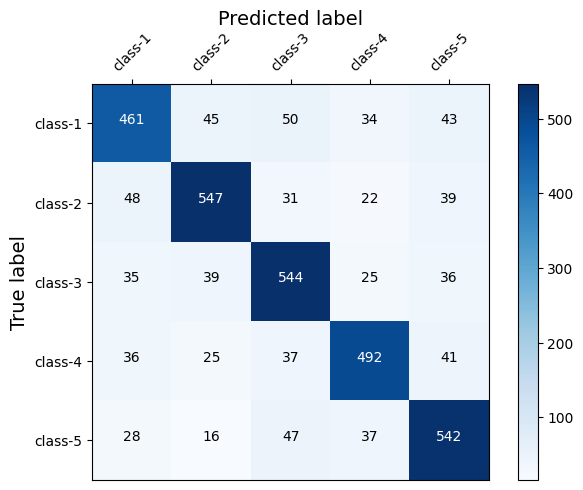

In [75]:
matrix = confusion_matrix(y_test,y_pred)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

Serão apresentadas as métricas de análise aplicados aos resultados obtidos nesta matriz confusão, sendo eles:
- Acurácia: A acurácia (accuracy ou ACC) é considerada uma das métricas mais simples e importantes, avalia simplesmente o percentual de acertos;
- Precisão: Métrica que avalia a quantidade de verdadeiros positivos sobre a soma de todos os valores positivos;
- F-score: F–measure, F-score ou score F1 é uma média harmônica calculada com base na precisão e na revocação;
- Sensibilidade: Essa métrica avalia a capacidade do método de detectar com sucesso resultados classificados como positivos;
- Especificidade: Avalia a capacidade do método de detectar resultados negativos.

Acurácia.

In [76]:
accuracy_score(y_test, y_pred)

0.7836363636363637

Precisão

In [77]:
print(precision_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='weighted'))

0.7836363636363637
0.7838456364781387
0.7839745959107041


Recall

In [78]:
print(recall_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='weighted'))

0.7836363636363637
0.7828683272216818
0.7836363636363637


F-score

In [79]:
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='weighted'))

0.7836363636363637
0.783077455724371
0.7835262799267289


Resultado para as métricas de acordo com as classes


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       633
           1       0.81      0.80      0.81       687
           2       0.77      0.80      0.78       679
           3       0.81      0.78      0.79       631
           4       0.77      0.81      0.79       670

    accuracy                           0.78      3300
   macro avg       0.78      0.78      0.78      3300
weighted avg       0.78      0.78      0.78      3300



Área Sob a Curva Roc - AUC

In [81]:
# calculate AUC
# Instead of using clf.predict, use clf.predict_proba to get predicted probabilities
y_probs = clf.predict_proba(X_test)
auc = roc_auc_score(y_test, y_probs, multi_class='ovo')
print('AUC: %.3f' % auc)

AUC: 0.953


Gráfico da curva ROC (Sensibilidade e especificidade)

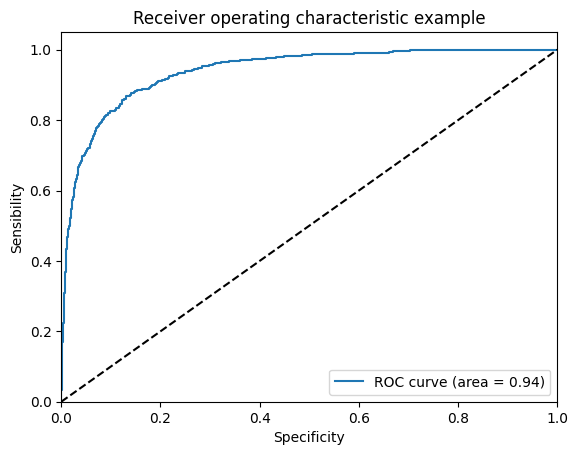

In [82]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
# Define n_classes based on the number of classes in y_probs
# Assuming y_probs is the output of predict_proba,
# its shape[1] should give you the number of classes.
n_classes = y_probs.shape[1]
# Binarize the target variable y_test
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)) # Added this line to binarize y_test

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    # Call the auc function from sklearn.metrics (it was previously overwritten)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i]) # Call sklearn.metrics.auc to avoid using the overwritten variable


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_probs.ravel())
# Use sklearn.metrics.auc instead of the overwritten 'auc' variable
roc_auc["micro"] = sklearn.metrics.auc(fpr["micro"], tpr["micro"]) # Changed this line

# Plot ROC curves for each class (example for class 0)
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity')
plt.ylabel('Sensibility')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()